**Tabular data science project - Part 1**

Tamar Michelson   323805861

Devora Siminovsky 213506272

## Imports and download

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

In [ ]:
df = pd.read_csv("/content/used_device_data.csv")

## Preprocessing the data

In [ ]:
# Convert "yes" and "no" in specific columns to binary values (1 and 0)
columns_with_yes_no = ['4g', '5g']
df[columns_with_yes_no] = df[columns_with_yes_no].replace({"yes": 1, "no": 0})

# Infer and optimize data types for object columns
df = df.infer_objects(copy=False)

# Convert categorical variables into dummy/one-hot-encoded variables
df_processed = pd.get_dummies(df)

# Convert boolean columns to binary values (1 and 0)
df_processed = df_processed.apply(
    lambda col: col.replace({True: 1, False: 0}) if col.dtype == bool else col
)



<ipython-input-54-53a8b4cd0a1a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_with_yes_no] = df[columns_with_yes_no].replace({"yes": 1, "no": 0})
<ipython-input-54-53a8b4cd0a1a>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda col: col.replace({True: 1, False: 0}) if col.dtype == bool else col


In [ ]:
df_processed.head()

,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,...,device_brand_Sony,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE,os_Android,os_Others,os_Windows,os_iOS
0,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,...,0,0,0,0,0,0,1,0,0,0
1,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,...,0,0,0,0,0,0,1,0,0,0
2,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,...,0,0,0,0,0,0,1,0,0,0
3,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,...,0,0,0,0,0,0,1,0,0,0
4,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Process nan values and fill them with the median of columns.
 # (all nan values are in numeric featurs).
rows_with_nan_count = df_processed.isna().any(axis=1).sum()
print(f"Number of rows with NaN values: {rows_with_nan_count}")
df_processed = df_processed.fillna(df_processed.median())
rows_with_nan_count_after_processing = df_processed.isna().any(axis=1).sum()
print(f"Number of rows with NaN values after processing: {rows_with_nan_count_after_processing}")


Number of rows with NaN values: 201
Number of rows with NaN values after processing: 0


In [ ]:
df_processed.describe()

,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,...,device_brand_Sony,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE,os_Android,os_Others,os_Windows,os_iOS
count,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,...,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,0.676028,0.044007,9.384534,6.553329,54.546957,4.036080,3133.170961,182.705761,2015.965258,...,0.024899,0.008686,0.033874,0.014186,0.038217,0.040533,0.930515,0.039664,0.019398,0.010423
std,3.805280,0.468057,0.205140,4.700148,6.968453,84.926611,1.364314,1298.565062,88.329494,2.298455,...,0.155839,0.092804,0.180930,0.118276,0.191746,0.197234,0.254313,0.195197,0.137939,0.101573
min,5.080000,0.000000,0.000000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.700000,0.000000,0.000000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,12.830000,1.000000,0.000000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,15.340000,1.000000,0.000000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,30.710000,1.000000,1.000000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Analysis

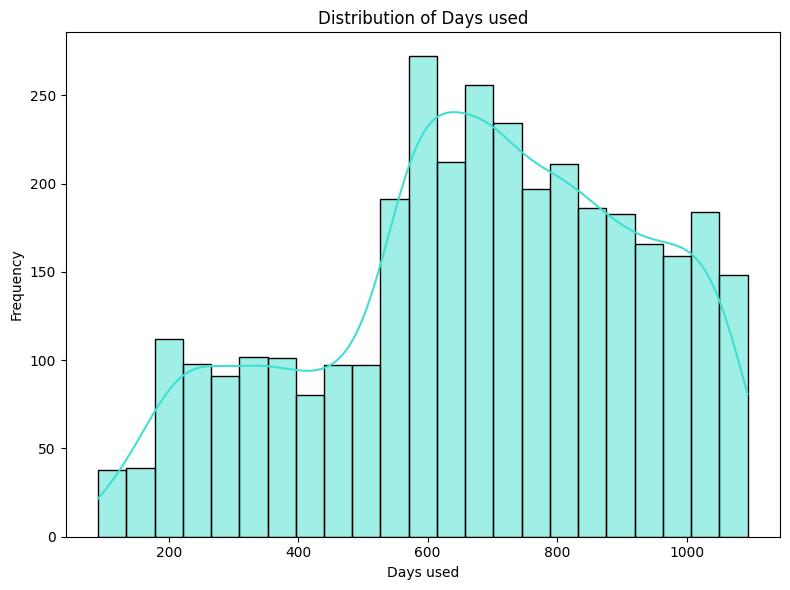

In [ ]:
# Plot distribution of the target - 'days_used'
plt.figure(figsize=(8, 6))

sns.histplot(df['days_used'], kde=True,color='turquoise')
plt.title('Distribution of Days used')
plt.xlabel('Days used')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



The plot above illustrates the distribution of the days_used column, which is the target variable in our regression task. This variable represents the number of days the devices were in use, and our goal is to predict this value based on the device's features and pricing data.

The x-axis shows the range of days_used, representing the duration of usage for the devices.
The y-axis indicates the frequency of devices used for the corresponding duration.
The KDE (Kernel Density Estimate) curve overlays the histogram, providing a smoothed representation of the data distribution.

 The histogram of the data reveals a right-skewed distribution, indicating that most users tend to keep their phones for extended periods before replacing them. This skewness likely reflects a common pattern: users generally retain their phones until they reach a point where an upgrade or replacement becomes necessary, which tends to occur less frequently.

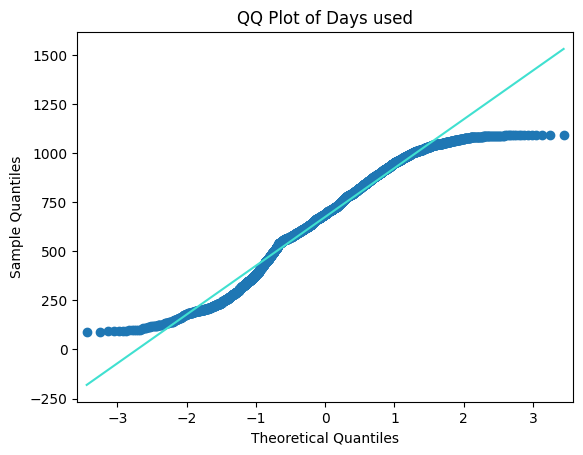

In [ ]:
import statsmodels.api as sm

# Create the QQ plot
p = sm.qqplot(df_processed.days_used, line='s')
plt.setp(p.gca().lines, color='turquoise')
plt.title('QQ Plot of Days used')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


The QQ plot of the target, days used, shows that the distribution is close to normal, with deviations primarily at the edges. At the lower end, the sample quantiles are higher than the theoretical quantiles, reflecting the natural boundary at zero—there are no negative values for the number of days a phone is used. At the upper end, the sample quantiles fall below the theoretical line, indicating that phone usage is capped, as people rarely retain phones indefinitely, especially if they are intended to retain resale value. These edge deviations highlight practical constraints on the data, but overall, the distribution aligns well with normality.

In [ ]:
from scipy.stats import pearsonr

# Calculate correlations and p-values
correlations = []
p_values = []

for col in df_processed.columns:
    if col != "days_used":
        corr, p_val = pearsonr(df_processed[col], df_processed["days_used"])
        correlations.append(corr)
        p_values.append(p_val)

# Create a DataFrame to store results
dtf_corr = pd.DataFrame({
    "Correlation": correlations,
    "P-value": p_values
}, index=df_processed.columns.drop("days_used"))
stars = []
for col in df_processed.columns:
    if col != "days_used":
        corr, p_val = pearsonr(df_processed[col], df_processed["days_used"])
        correlations.append(corr)
        p_values.append(p_val)

        # Add '*' if p-value is less than 0.05
        if p_val < 0.05:
            stars.append('*')
        else:
            stars.append('')

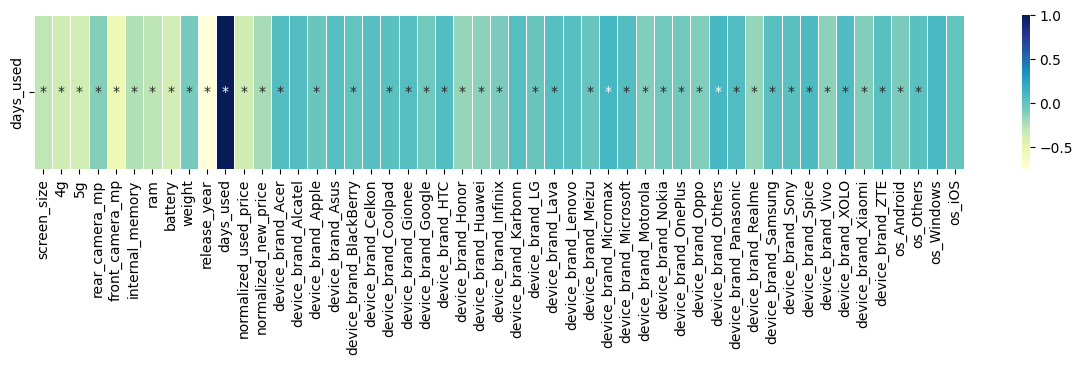

In [ ]:
dtf_corr = df_processed.corr(method="pearson").loc[["days_used"]]

# Create a list of annotations with stars
annot = []
for i, corr in enumerate(dtf_corr.iloc[0]):
    star = stars[i] if i < len(stars) else ''
    annot.append(f'{star}')

# Plot the heatmap with annotations
fig, ax = plt.subplots(figsize=(15, 2))
sns.heatmap(dtf_corr, annot=[annot], fmt='', cmap="YlGnBu", cbar=True, linewidths=0.5, ax=ax)

plt.show()

This heatmap visualizes the correlation matrix of the features with the target variable "days_used." Each cell represents the correlation coefficient between a feature and "days_used." The color intensity indicates the strength and direction of the correlation. The stars appear on features where the correlation is significant.

The heatmap shows that release_year has a strong negative correlation with days_used. This is because older devices, released further in the past, have had more time to be used before being resold. Since this feature is inherently tied to the target variable through time, we will remove it to avoid introducing bias or data leakage into the predictive model.


In [ ]:
df_processed = df_processed.drop(columns=["release_year"])

<ipython-input-63-23e1ffdcd69d>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_processed[df_processed['5g'] == 1]['days_used'], label='5g', shade=True, color='pink')
<ipython-input-63-23e1ffdcd69d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_processed[df_processed['5g'] == 0]['days_used'], label='No 5g', shade=True, color='turquoise')


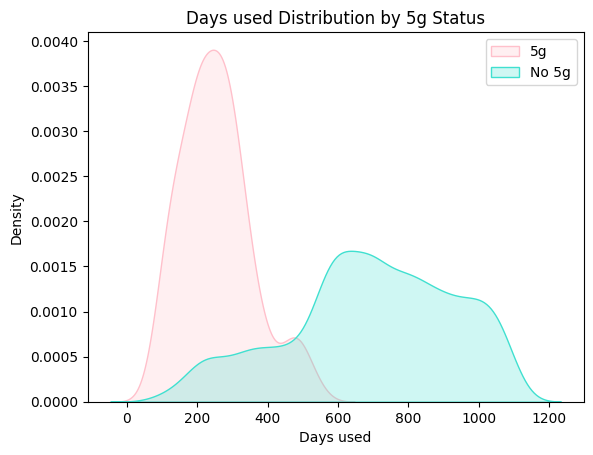

In [ ]:
sns.kdeplot(df_processed[df_processed['5g'] == 1]['days_used'], label='5g', shade=True, color='pink')
sns.kdeplot(df_processed[df_processed['5g'] == 0]['days_used'], label='No 5g', shade=True, color='turquoise')
plt.title('Days used Distribution by 5g Status')
plt.xlabel('Days used')
plt.ylabel('Density')
plt.legend()
plt.show()


The plot shows the distribution of days_used for devices with and without fifth-generation (5G) capabilities. Devices without 5G capabilities tend to have a higher median usage duration and a greater spread of usage durations compared to those with 5G capabilities.

This pattern likely reflects consumer behavior: individuals who purchase the latest 5G-enabled phones often prefer to upgrade to newer models sooner, reselling their current devices. In contrast, users with 4G devices may be more inclined to keep their phones for longer periods before replacing them, resulting in longer and more varied usage durations.



 When comparing devices with 5G to those without 5G, we observe that, on average, devices with 5G have fewer days of use. There is a negative correlation between the days used and having 5G features. This suggests that 5G devices tend to be used for shorter periods compared to non-5G devices.

However, when focusing only on the group of devices with 5G, the situation changes. Within this group, as the internal memory increases, the number of days the device is used also increases, showing a positive correlation. This correlation is specific to the 5G devices and should not be generalized to all devices.


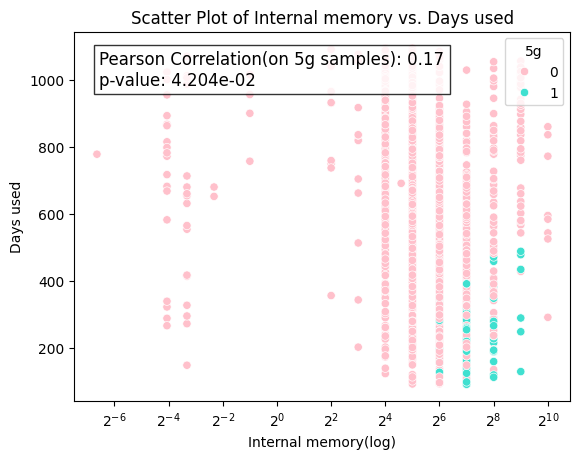

In [ ]:
# Scatter plot with color-coded target variable
sns.scatterplot(
    x='internal_memory',
    y='days_used',
    hue='5g',
    palette={0: 'pink', 1: 'turquoise'},
    data=df_processed
)

# Compute the Pearson correlation coefficient and p-value
yes_1 = df_processed[df_processed['5g'] == 1]['internal_memory']
yes_2 = df_processed[df_processed['5g'] == 1]['days_used']
correlation, p_value = pearsonr(yes_1, yes_2)

# Show Pearson correlation and p-value on the plot in the upper-left corner
plt.text(
    0.05, 0.95,
    f'Pearson Correlation(on 5g samples): {correlation:.2f}\np-value: {p_value:.3e}',
    transform=plt.gca().transAxes, fontsize=12, color='black',
    ha='left', va='top', bbox=dict(facecolor='white', alpha=0.8, edgecolor='black')
)

# Title and labels
plt.xscale('log', base=2)  # Memory is in base 2
plt.title('Scatter Plot of Internal memory vs. Days used')
plt.xlabel('Internal memory(log)')
plt.ylabel('Days used')
plt.legend(title='5g', loc='upper right')

# Show plot
plt.show()


This scatter plot visualizes the relationship between internal_memory and days_used, with points color-coded by the 5g capability of the devices (0 for no 5G, 1 for 5G).

The Pearson correlation coefficient and p-value displayed on the plot are computed specifically for the subset of data where 5g = 1 (indicating 5G-enabled devices).There is weak correlation value of 0.17.
 This correlation measures the strength and direction of the linear relationship between internal_memory and days_used for these 5G devices only.

It's important to note that this correlation is not representative of the entire dataset.

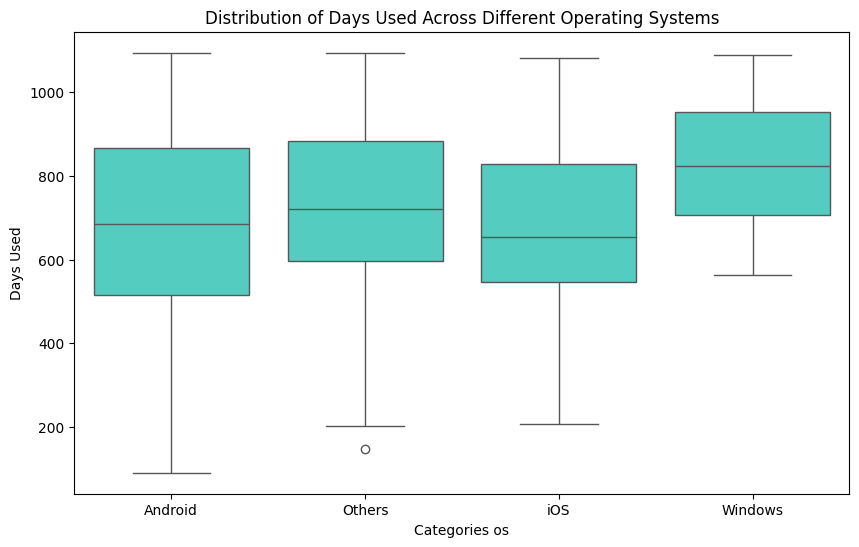

In [ ]:

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='os', y='days_used',color='turquoise')
plt.title('Distribution of Days Used Across Different Operating Systems')
plt.xlabel('Categories os')
plt.ylabel('Days Used')
plt.show()


The box plot reveals the distribution of "days used" across four categories: Android, Others, iOS, and Windows. While Windows devices exhibit the highest median usage duration, the differences in median usage are relatively small across the categories. Furthermore, the spread of usage durations is comparable across all operating systems, suggesting that the variability in usage patterns is consistent regardless of the operating system.

## Basic Model Pipeline



In this section, we performed a train-test split on the dataset to prepare it for model evaluation, with 80% of the data used for training and 20% for testing. We then trained two models: a Linear Regression model and an XGBoost Regressor. Both models were evaluated using the mean squared error (MSE), mean absolute error (MAE), and R² score, which were calculated for the predictions on the test set. The results were displayed in a table format for easy comparison of the models' performance.








In [ ]:
# Train-test split
X = df_processed.drop(columns=["days_used"])
y = df_processed["days_used"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# First model - Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Second model - XGBoost Model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [ ]:
# Results of 2 models

mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)



In [ ]:
from tabulate import tabulate

# Model evaluation results
results = [
    ["Linear Regression", mse_lr, mae_lr, r2_lr],
    ["XGBoost", mse_xgb, mae_xgb, r2_xgb]
]

# Define headers
headers = ["Model", "MSE", "MAE", "R²"]

# Print the results in a nicely formatted table
print("Model Evaluation Results:")
print(tabulate(results, headers=headers, floatfmt=".4f", tablefmt="pretty"))


Model Evaluation Results:
+-------------------+--------------------+-------------------+---------------------+
|       Model       |        MSE         |        MAE        |         R²          |
+-------------------+--------------------+-------------------+---------------------+
| Linear Regression | 33251.64354664175  | 150.146714757805  | 0.47876401125567647 |
|      XGBoost      | 28194.112814489585 | 137.5021853412457 |  0.558043360710144  |
+-------------------+--------------------+-------------------+---------------------+


## Error Analysis

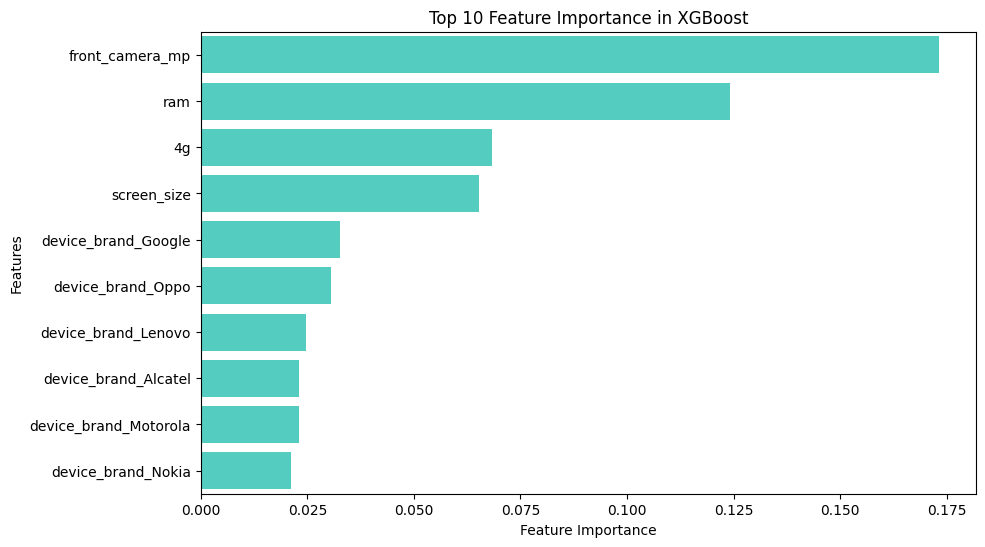

In [ ]:

# Feature importance from XGBoost
feats = pd.DataFrame(index=X.columns, data=xgb.feature_importances_, columns=["Feature Importance"])
XGB_feature_imp = feats.sort_values("Feature Importance", ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(y=XGB_feature_imp.head(10).index, x=XGB_feature_imp.head(10)["Feature Importance"], orient="h",color='turquoise')
plt.title("Top 10 Feature Importance in XGBoost")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


The bar plot shows the top 10 most important features identified by the XGBoost model based on their contribution to the prediction performance.

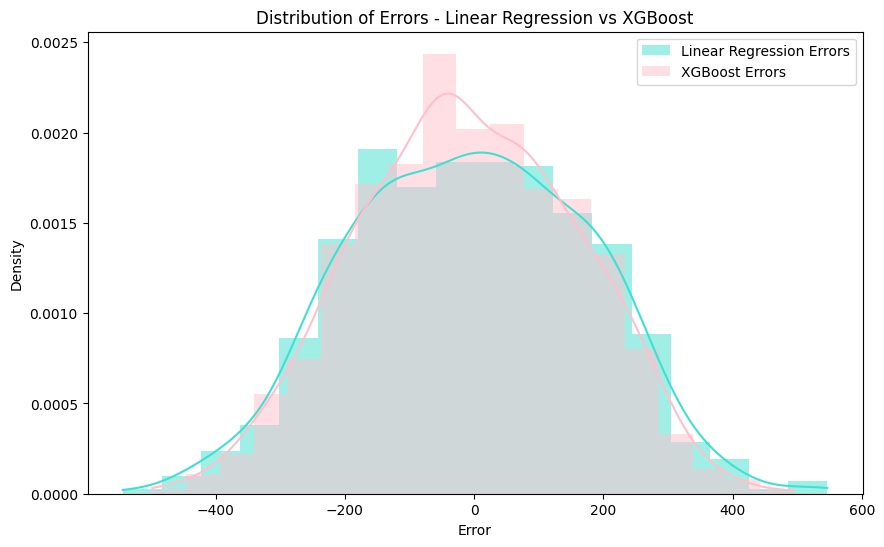

In [ ]:
# Compute errors for both models
errors_lr = y_test - y_pred_lr
errors_xgb = y_test - y_pred_xgb

# Plot error distributions for both models
plt.figure(figsize=(10, 6))
sns.histplot(errors_lr, color='turquoise', label='Linear Regression Errors', kde=True, stat="density", linewidth=0)
sns.histplot(errors_xgb, color='pink', label='XGBoost Errors', kde=True, stat="density", linewidth=0)
plt.title("Distribution of Errors - Linear Regression vs XGBoost")
plt.xlabel('Error')
plt.ylabel('Density')
plt.legend()
plt.show()


The position of the error distribution relative to zero determines if the model is overestimating or underestimating.

The distribution is approximately centered around zero, which means the model is balanced in terms of overestimation and underestimation.

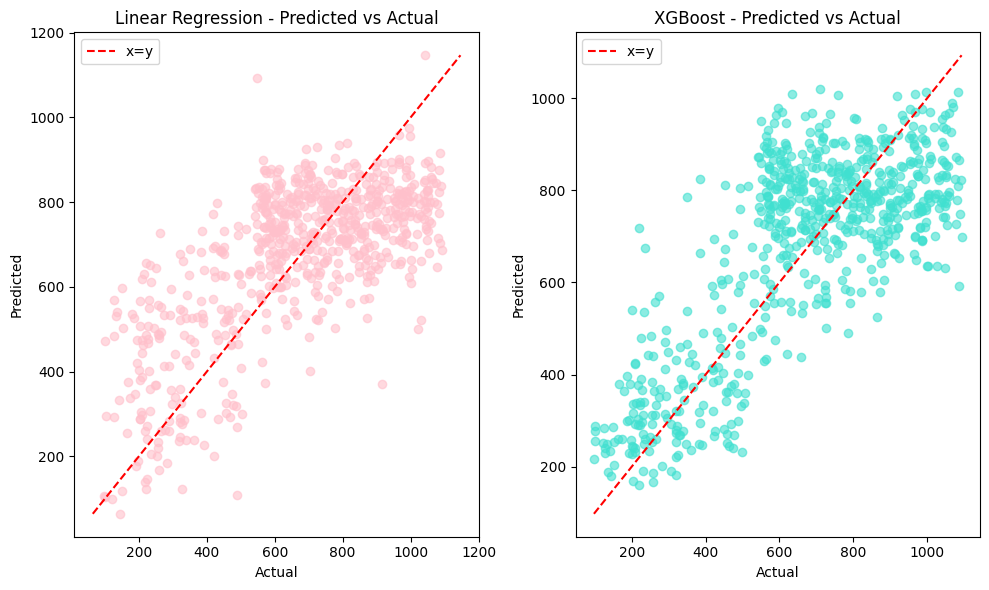

In [ ]:

# Predicted vs Actual plot for error analysis
plt.figure(figsize=(10, 6))

# Scatter plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='pink', alpha=0.6)
plt.title("Linear Regression - Predicted vs Actual")
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Add x=y line
line_range = np.linspace(min(y_test.min(), y_pred_lr.min()), max(y_test.max(), y_pred_lr.max()), 100)
plt.plot(line_range, line_range, color='red', linestyle='--', linewidth=1.5, label='x=y')
plt.legend()

# Scatter plot for XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, color='turquoise', alpha=0.6)
plt.title("XGBoost - Predicted vs Actual")
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Add x=y line
line_range = np.linspace(min(y_test.min(), y_pred_xgb.min()), max(y_test.max(), y_pred_xgb.max()), 100)
plt.plot(line_range, line_range, color='red', linestyle='--', linewidth=1.5, label='x=y')
plt.legend()

plt.tight_layout()
plt.show()



This Predicted vs Actual plot is used for error analysis and evaluating model performance.

Each point represents an individual prediction made by the model (y-axis) against the true value (x-axis).

The red dashed line (x=y) represents perfect predictions. Any point on this line indicates that the model predicted the exact value.

Points above the x=y line indicate overestimation by the model (predicted value > actual value).

Points below the x=y line indicate underestimation by the model (predicted value < actual value).


Observations:

The Linear Regression plot (left) shows a little more spread than the XGBoost, but both model show alignment with x=y, which indicates not very large errors.
Many points are not on the x=y line which we will want to improve in the next stage of the project.

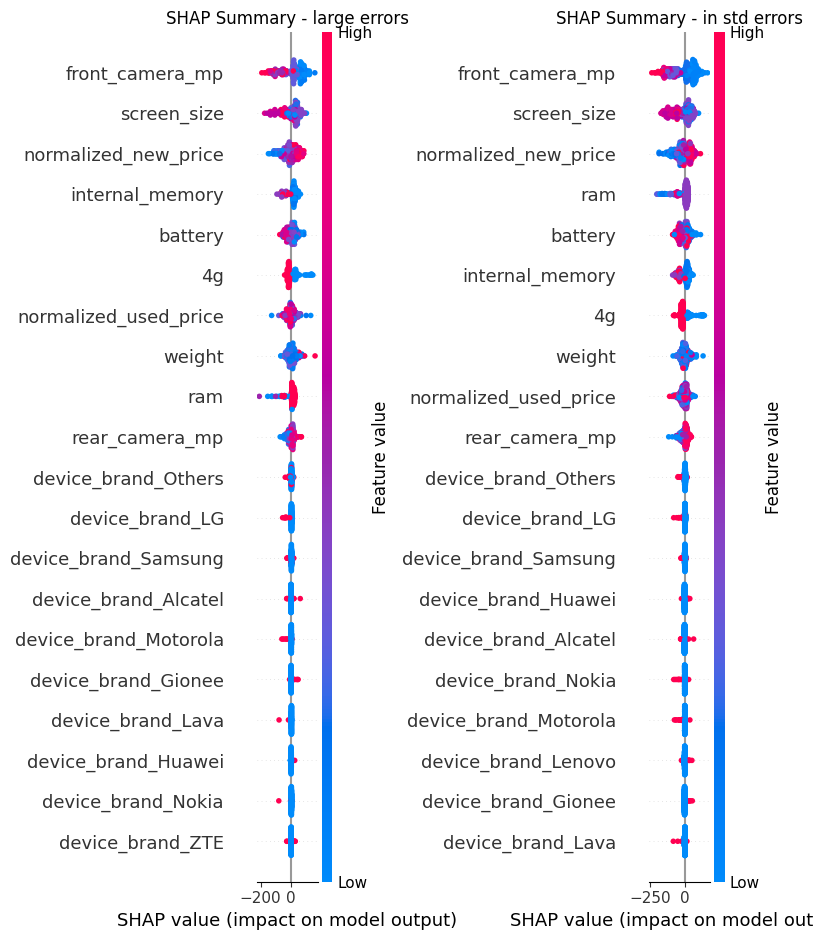

In [ ]:

import shap

threshold_xgb = np.std(errors_xgb)
# Divied the test samples into samples with small errors (less than std)
# and large errors.
wrong_prediction = np.abs(errors_xgb) > threshold_xgb
small_error = np.abs(errors_xgb) < threshold_xgb
wrong_prediction_group = X_test[wrong_prediction]
small_error_group = X_test[small_error]

# SHAP for XGBoost, for small errors and large errors.
explainer_xgb = shap.Explainer(xgb, X_test)
shap_values_xgb_wrong_prediction = explainer_xgb(wrong_prediction_group)
shap_values_xgb_small_error = explainer_xgb(small_error_group)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# SHAP Summary Plot for large errors
plt.sca(axes[0])
shap.summary_plot(shap_values_xgb_wrong_prediction, wrong_prediction_group, plot_type="dot", show=False)
axes[0].set_title("SHAP Summary - large errors")

# SHAP Summary Plot for small errors
plt.sca(axes[1])
shap.summary_plot(shap_values_xgb_small_error, small_error_group, plot_type="dot", show=False)
axes[1].set_title("SHAP Summary - in std errors")

# Adjust layout and display
plt.tight_layout()
plt.show()




SHAP is a method for interpreting machine learning models by assigning each feature a contribution to the model's prediction. SHAP provides insights into which features are most important and how they affect the model's output.

We computed SHAP values on 2 groups - samples with large errors and those within the standard deviation.

By comparing the SHAP values for these groups, we can understand how features influence the predictions differently for each set. The top features are the same in both groups except for internal memory and thus we analyze it more deeply in the next section.

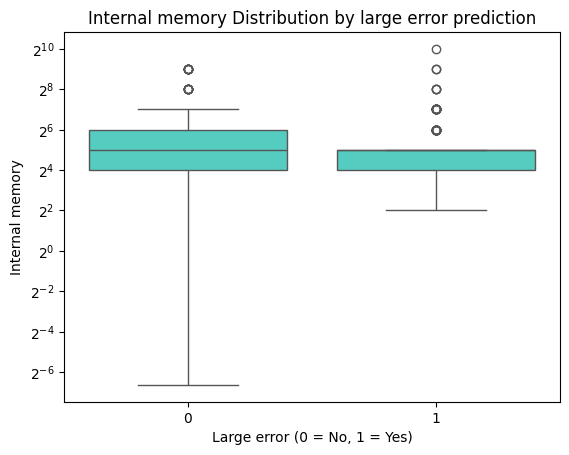

In [ ]:
# Add a boll column of large errors threshold
X_test['wrong_prediction'] = wrong_prediction.astype(int)
sns.boxplot(x='wrong_prediction', y='internal_memory', data=X_test, color='turquoise')
plt.title('Internal memory Distribution by large error prediction')
plt.xlabel('Large error (0 = No, 1 = Yes)')
plt.ylabel('Internal memory')
plt.yscale('log', base=2) # Memory is in base 2
plt.show()


We can infer from the plot that the distribution is different in the 2 groups, thus the memory feature affects the predictions and may sabotag the model.

Another important thing to notice - the large eroor group as many outliers at 2^10 = 1024 which is usualy tablets and not phones which can also be affecting the model.

In [ ]:

# Merge X_test and y_test only for correlation calculation
df_for_corr = pd.concat([X_test, y_test.rename('days_used')], axis=1)
# Split into groups using 'wrong_prediction'
group_0 = df_for_corr[df_for_corr['wrong_prediction'] == 0].drop(columns=['wrong_prediction'])
group_1 = df_for_corr[df_for_corr['wrong_prediction'] == 1].drop(columns=['wrong_prediction'])
# Calculate correlation for each group
dtf_corr_0 = group_0.corr(method="pearson").loc[["days_used"]]
dtf_corr_1 = group_1.corr(method="pearson").loc[["days_used"]]



In [ ]:

# Calculate correlations and p-values

correlations_0 = []
p_values_0 = []
stars_0 = []
for col in group_0.columns:
    if col != "days_used":
        corr, p_val = pearsonr(group_0[col], group_0["days_used"])
        correlations_0.append(corr)
        p_values_0.append(p_val)

        # Add '*' if p-value is less than 0.05
        if p_val < 0.05:
            stars_0.append('*')
        else:
            stars_0.append('')
correlations_1 = []
p_values_1 = []
stars_1 = []
for col in group_1.columns:
    if col != "days_used":
        corr, p_val = pearsonr(group_1[col], group_1["days_used"])
        correlations_1.append(corr)
        p_values_1.append(p_val)

        # Add '*' if p-value is less than 0.05
        if p_val < 0.05:
            stars_1.append('*')
        else:
            stars_1.append('')

<ipython-input-24-49ace8d645e3>:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_val = pearsonr(group_0[col], group_0["days_used"])
<ipython-input-24-49ace8d645e3>:22: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_val = pearsonr(group_1[col], group_1["days_used"])


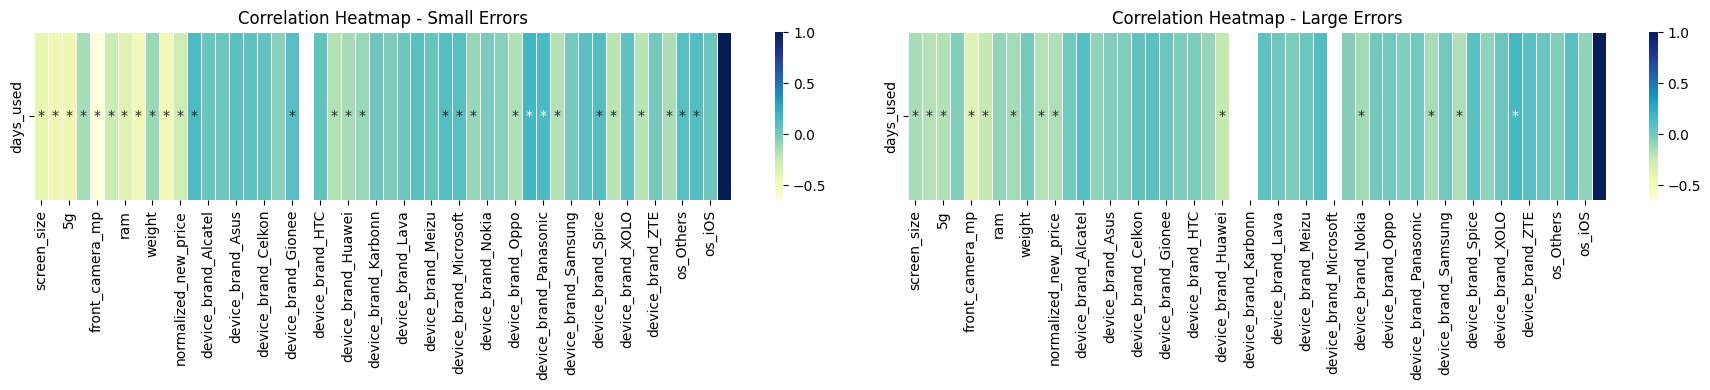

In [ ]:


# Create annotation lists for each group
annot_0 = [f'{stars_0[i]}' if i < len(stars_0) else '' for i, _ in enumerate(dtf_corr_0.iloc[0])]
annot_1 = [f'{stars_1[i]}' if i < len(stars_1) else '' for i, _ in enumerate(dtf_corr_1.iloc[0])]

# Plot heatmaps for both groups
fig, axes = plt.subplots(1, 2, figsize=(18, 4))
# Calculate the minimum and maximum values for both correlation matrices
vmin = min(dtf_corr_0.min().min(), dtf_corr_1.min().min())
vmax = max(dtf_corr_0.max().max(), dtf_corr_1.max().max())
# Heatmap for group 0
sns.heatmap(dtf_corr_0, annot=[annot_0], fmt='', cmap="YlGnBu", cbar=True,
            linewidths=0.5, vmin=vmin, vmax=vmax, ax=axes[0])
axes[0].set_title("Correlation Heatmap - Small Errors")

# Heatmap for group 1
sns.heatmap(dtf_corr_1, annot=[annot_1], fmt='', cmap="YlGnBu", cbar=True,
            linewidths=0.5, vmin=vmin, vmax=vmax, ax=axes[1])
axes[1].set_title("Correlation Heatmap - Large Errors")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

The correlation heatmaps illustrate distinct patterns for samples with small errors (left) and those with large errors (right) in the model's predictions. For samples with small errors, the correlations between days_used and features such as front_camera_mp, ram, and 5g are more pronounced, indicating that these variables strongly influence accurate predictions. In contrast, for samples with large errors, these correlations weaken, suggesting that the model struggles to leverage these features effectively in cases of high error. This discrepancy highlights potential challenges in the model's ability to generalize across certain feature combinations or outlier scenarios.